<h1>Perceptron Trick For Logistic Regression</h1>

In [5]:
from sklearn.datasets import make_classification
import numpy as np
# X,y= make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
#                          n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)
X,y= make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                         n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

In [6]:
import matplotlib.pyplot as plt

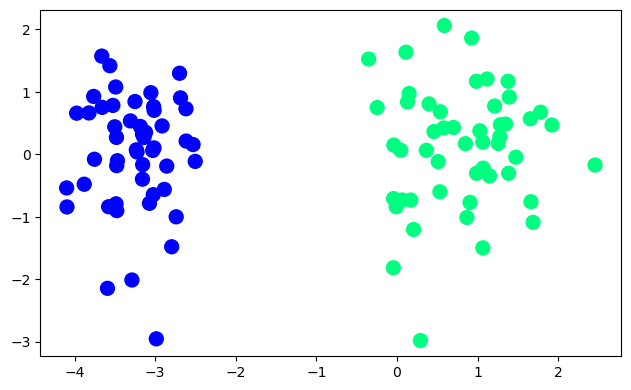

In [7]:
plt.figure(figsize=[7.5,4.5])
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [8]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1
    epochs=1000
    for i in range(epochs):
        random_row=np.random.randint(0,100)
        y_hat=step(np.dot(X[random_row],weights)) # made step function to get 0 or 1 only.
        weights=weights+lr*(y[random_row]-y_hat)*X[random_row]

    return weights[0],weights[1:] # weights[0] represent intercept(c) and weights from 1 onwards represent coefficients A and B.

In [9]:
def step(z):
    return 1 if z>0 else 0

In [10]:
intercept_,coef_=perceptron(X,y)

In [11]:
print(coef_)
print(intercept_)

[0.98628302 0.45500818]
1.3000000000000003


In [12]:
# Ax+By+c=0  line equation.
m=-(coef_[0]/coef_[1])  # slope, m=-A/B
b=-(intercept_/coef_[1]) # b=-C/B
print(m,b)

-2.167616010716917 -2.857091482810232


In [13]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

(-3.0, 2.0)

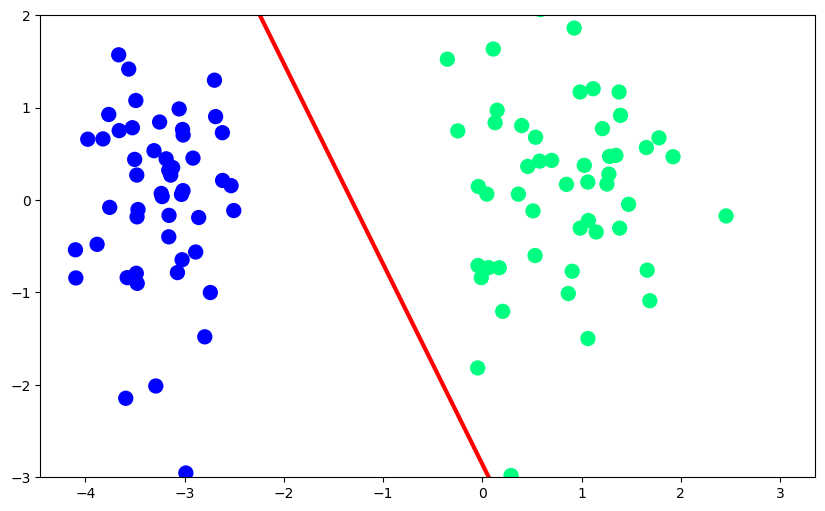

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<h1>Sigmoid Function</h1>

In [15]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1
    epochs=1000
    for i in range(epochs):
        random_row=np.random.randint(0,100)
        y_hat=sigmoid(np.dot(X[random_row],weights)) # made step function to get 0 or 1 only.
        weights=weights+lr*(y[random_row]-y_hat)*X[random_row]

    return weights[0],weights[1:] # weights[0] represent intercept(c) and weights from 1 onwards represent coefficients A and B.

In [16]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [17]:
intercept_,coef_=perceptron(X,y)

In [18]:
# Ax+By+c=0  line equation.
m=-(coef_[0]/coef_[1])  # slope, m=-A/B
b=-(intercept_/coef_[1]) # b=-C/B
print(m,b)
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input+b

-18.30695718578543 -18.551019108674076


(-3.0, 2.0)

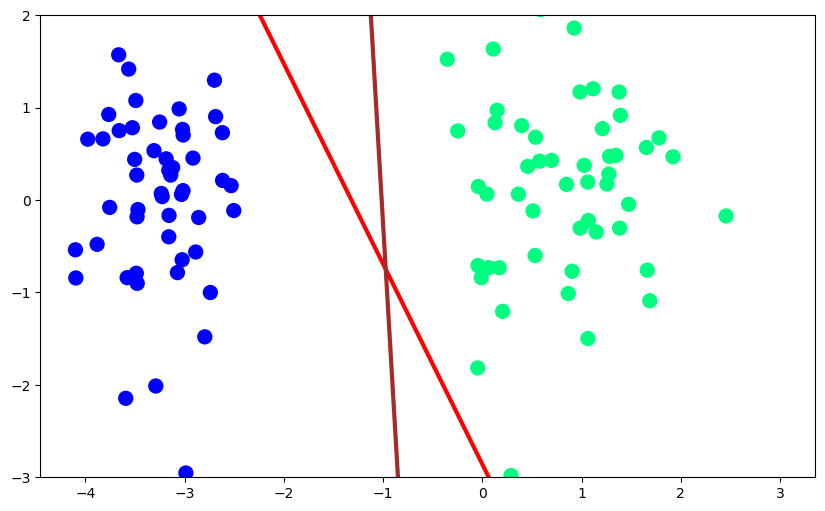

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<h1>Logisitic Regression Using Gradient Descent(Loss function)</h1>

<h1>Logistic Regression using Gradient Descent</h1>

In [20]:
def gd(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.5
    for i in range(5000):
        y_hat=sigmoid(np.dot(X,weights))
        weights=weights+ lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[1:],weights[0]

In [21]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [22]:
coef_,intercept_=gd(X,y)

In [23]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [24]:
x_input2=np.linspace(-3,3,100)
y_input2=m*x_input2+b

(-3.0, 2.0)

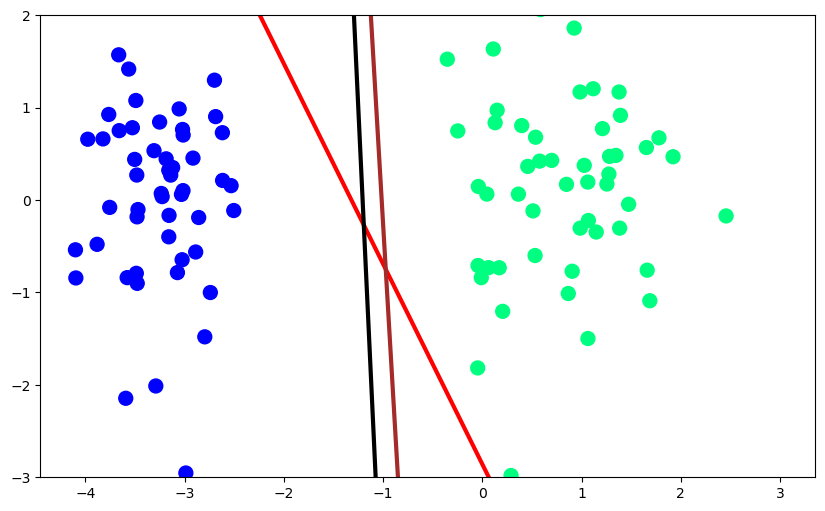

In [25]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)  #Perceptron.
plt.plot(x_input1,y_input1,color='brown',linewidth=3) #Sigmoid.
plt.plot(x_input2,y_input2,color='black',linewidth=3) #Loss function.
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<h1>Logistic Regression SciKit Learn</h1>

In [26]:
from sklearn.linear_model import LogisticRegression

In [30]:
lor=LogisticRegression(penalty=None,solver='sag')
lor.fit(X,y)

C:\Users\Sahil sharma\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [31]:
print(lor.coef_)
print(lor.intercept_)

[[4.80875865 0.21457164]]
[5.78159025]


In [40]:
m1=-(lor.coef_[0][0]/lor.coef_[0][1])
b1=-(lor.intercept_/lor.coef_[0][1])
# print(lor.coef_[0][0])

In [43]:
x_input3=np.linspace(-3,3,100)
y_input3=m1*x_input3+b1

(-3.0, 2.0)

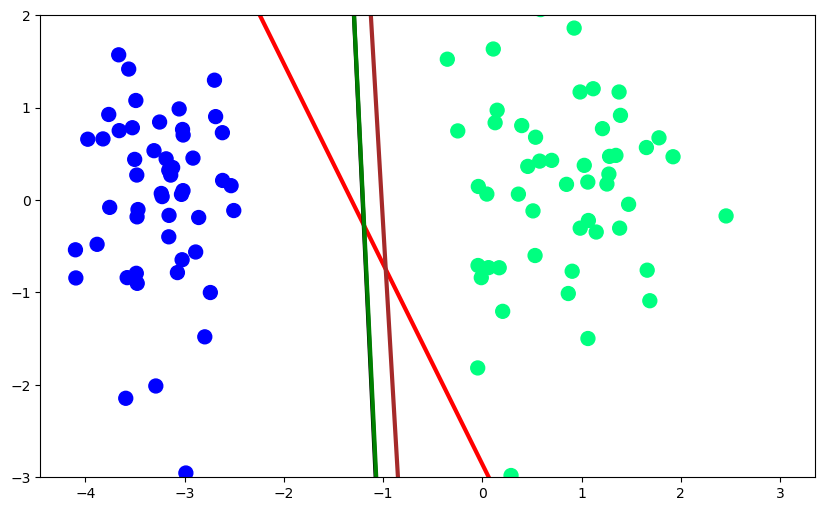

In [47]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)  #Perceptron.
plt.plot(x_input1,y_input1,color='brown',linewidth=3) #Sigmoid.
plt.plot(x_input2,y_input2,color='black',linewidth=3) #Loss function.
plt.plot(x_input3,y_input3,color='green',linewidth=3) #SkLearn Logistic Regression.
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<h1>Softmax Regression/Logistic Regression with multiple classes/Multimonial Logistic Regression</h1>

In [49]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd

In [50]:
df=sns.load_dataset('iris')

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
encoder=LabelEncoder()
df['species']=encoder.fit_transform(df['species'])

In [56]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [57]:
df=df[['sepal_length','petal_length','species']]

In [58]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [59]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
mlg=LogisticRegression(multi_class='multinomial')

In [62]:
mlg.fit(X_train,y_train)

C:\Users\Sahil sharma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [63]:
y_pred=mlg.predict(X_test)

In [64]:
print(accuracy_score(y_pred,y_test))

0.9666666666666667


In [65]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [66]:
#Prediction.
query=np.array([[3.4,2.7]])
mlg.predict_proba(query)

C:\Users\Sahil sharma\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

In [68]:
#Sum of above answer will give 1 and the model has returned maximum possible answer among those 3.
mlg.predict(query)

C:\Users\Sahil sharma\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [71]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 478.9 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 654.5 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 765.2 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 859.1 kB/s eta 0:00:00


C:\Users\Sahil sharma\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


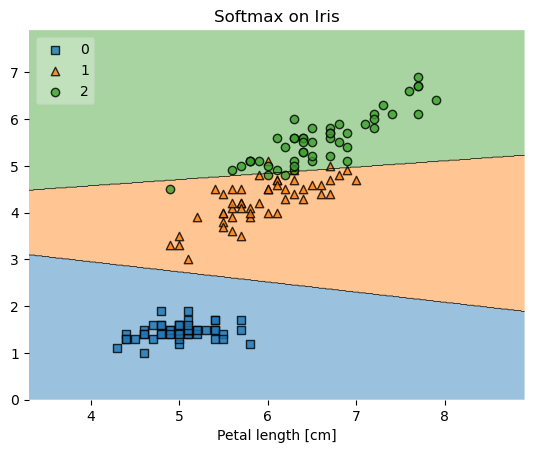

In [72]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,mlg,legend=2)

plt.xlabel('Sepal length [cm]')
plt.xlabel('Petal length [cm]')
plt.title('Softmax on Iris')

plt.show()